In [1]:
# =========================================
# LOGISTIC REGRESSION ON SYNTHETIC RESUMES
# Features: Employment_Gaps, Years_Experience, GPA
# =========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load existing dataset
df = pd.read_csv("resumes.csv")

# Select features and label
X = df[["Employment_Gaps", "Years_Experience", "GPA"]]
y = df["Hired"]

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nMODEL PERFORMANCE")
print("----------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Inspect learned coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")



MODEL PERFORMANCE
----------------
Accuracy: 0.7066666666666667

Confusion Matrix:
[[113  46]
 [ 42  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       159
           1       0.68      0.70      0.69       141

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300


Feature Coefficients:
Employment_Gaps: -1.149
Years_Experience: 0.160
GPA: 1.424


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7066666666666667


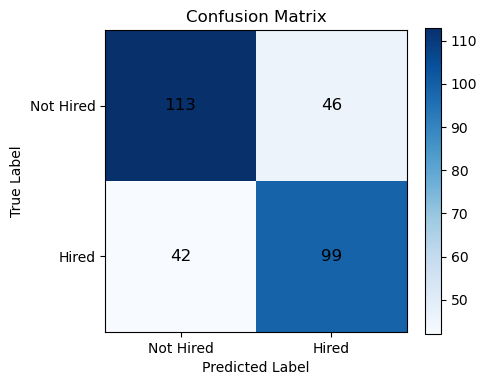

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not Hired", "Hired"])
plt.yticks(tick_marks, ["Not Hired", "Hired"])

# Add numbers inside the boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="black", fontsize=12)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [4]:
# -------------------------------------
# LIVE DEMO: Predict on a new resume
# -------------------------------------

def predict_resume(model):
    print("\n=== LIVE RESUME HIRING PREDICTOR ===")

    while True:
        try:
            gaps = int(input("Enter number of employment gaps (0–2): "))
            years = float(input("Enter years of experience (0–17): "))
            gpa = float(input("Enter GPA (2.0–4.0): "))

            # Create input in the same format as training data
            X_new = pd.DataFrame([[gaps, years, gpa]],
                                 columns=["Employment_Gaps", "Years_Experience", "GPA"])

            # Predict probability and class
            prob = model.predict_proba(X_new)[0][1]
            pred = model.predict(X_new)[0]

            print("\n--- Prediction ---")
            print("Predicted probability of being HIRED:", round(prob, 3))

            if pred == 1:
                print("Result: ✅ HIRED")
            else:
                print("Result: ❌ NOT HIRED")

        except Exception as e:
            print("Invalid input. Please enter numbers only.")

        again = input("\nTest another resume? (y/n): ").lower()
        if again != "y":
            print("\nExiting demo.")
            break


# Run the live demo
predict_resume(model)



=== LIVE RESUME HIRING PREDICTOR ===


Enter number of employment gaps (0–2):  1
Enter years of experience (0–17):  7
Enter GPA (2.0–4.0):  3.9



--- Prediction ---
Predicted probability of being HIRED: 0.705
Result: ✅ HIRED



Test another resume? (y/n):  n



Exiting demo.
